<a href="https://colab.research.google.com/github/crizzzly/SpaceMissionAnalysis/blob/main/Space_Missions_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introduction

<center><img src="https://i.imgur.com/9hLRsjZ.jpg" height=400></center>

This dataset was scraped from [nextspaceflight.com](https://nextspaceflight.com/launches/past/?page=1) and includes all the space missions since the beginning of Space Race between the USA and the Soviet Union in 1957!

### Install Package with Country Codes

In [251]:
%pip install iso3166

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


### Upgrade Plotly

Run the cell below if you are working with Google Colab.

In [252]:
%pip install --upgrade plotly

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


### Import Statements

In [253]:
import numpy as np
import pandas as pd
import plotly.express as px
import plotly.graph_objects as go
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import seaborn as sns

# These might be helpful:
from iso3166 import countries
from datetime import datetime, timedelta

### Notebook Presentation

In [254]:
pd.options.display.float_format = '{:,.2f}'.format

### Load the Data

In [255]:
df_data = pd.read_csv('mission_launches_updated.csv')

# Preliminary Data Exploration

* What is the shape of `df_data`? 
* How many rows and columns does it have?
* What are the column names?
* Are there any NaN values or duplicates?

In [256]:
print(f"Columns: {df_data.shape[1]}\nRows: {df_data.shape[0]}")

Columns: 8
Rows: 6510


In [257]:
df_data.columns

Index(['Unnamed: 0', 'Organisation', 'Location', 'Datetime', 'Details',
       'Status', 'Price', 'Mission_status'],
      dtype='object')

In [258]:
# df_data.drop_duplicates(inplace=True)
df_data.shape

(6510, 8)

In [259]:
df_data.tail(20)

,Unnamed: 0,Organisation,Location,Datetime,Details,Status,Price,Mission_status
6490,6490,US Navy,"Inyokern, China Lake, California, USA","Mon Aug 25, 1958",NOTS-EV-1 | Pilot 4,Retired,NaN,Failure
6491,6491,ABMA,"LC-5, Cape Canaveral SFS, Florida, USA","Sun Aug 24, 1958 06:17 UTC",Juno I | Explorer 5,Retired,NaN,Failure
6492,6492,US Navy,"Inyokern, China Lake, California, USA","Fri Aug 22, 1958",NOTS-EV-1 | Pilot 3,Retired,NaN,Failure
6493,6493,US Air Force,"SLC-17A, Cape Canaveral SFS, Florida, USA","Sun Aug 17, 1958 12:18 UTC",Thor-DM 18 Able I | Pioneer 0,Retired,NaN,Failure
6494,6494,US Navy,"Inyokern, China Lake, California, USA","Tue Aug 12, 1958",NOTS-EV-1 | Pilot 2,Retired,NaN,Failure
6495,6495,ABMA,"LC-5, Cape Canaveral SFS, Florida, USA","Sat Jul 26, 1958 15:00 UTC",Juno I | Explorer 4,Retired,NaN,Success
6496,6496,US Navy,"Inyokern, China Lake, California, USA","Fri Jul 25, 1958",NOTS-EV-1 | Pilot 1,Retired,NaN,Failure
6497,6497,US Navy,"LC-18A, Cape Canaveral SFS, Florida, USA","Thu Jun 26, 1958 05:00 UTC",Vanguard | Vanguard SLV-2,Retired,NaN,Failure
6498,6498,US Navy,"LC-18A, Cape Canaveral SFS, Florida, USA","Wed May 28, 1958 03:46 UTC",Vanguard | Vanguard SLV-1,Retired,NaN,Failure
6499,6499,RVSN USSR,"Site 1/5, Baikonur Cosmodrome, Kazakhstan","Thu May 15, 1958 07:00 UTC",Sputnik 8A91 | Sputnik 3,Retired,NaN,Success


## Data Cleaning - Check for Missing Values and Duplicates

Consider removing columns containing junk data. 

In [260]:
df_data_dropna = df_data.dropna(axis=0, subset=["Price"])
df_data.fillna(value=0, inplace=True)
df_data.isna().any()

Unnamed: 0        False
Organisation      False
Location          False
Datetime          False
Details           False
Status            False
Price             False
Mission_status    False
dtype: bool

In [261]:
df_data.drop(columns=["Unnamed: 0"], inplace=True)
df_data.head()

,Organisation,Location,Datetime,Details,Status,Price,Mission_status
0,CASC,"Site 9401 (SLS-2), Jiuquan Satellite Launch Ce...","Sun Apr 16, 2023 01:36 UTC",Long March 4B | Fengyun-3G,Active,64.68,Success
1,SpaceX,"SLC-4E, Vandenberg SFB, California, USA","Sat Apr 15, 2023 06:48 UTC",Falcon 9 Block 5 | Transporter 7,Active,67.00,Success
2,Arianespace,"ELA-3, Guiana Space Centre, French Guiana, France","Fri Apr 14, 2023 12:14 UTC",Ariane 5 ECA | JUICE (Jupiter Icy Moons Explorer),Active,200.00,Success
3,SpaceX,"SLC-40, Cape Canaveral SFS, Florida, USA","Fri Apr 07, 2023 04:30 UTC",Falcon 9 Block 5 | Intelsat 40e/TEMPO,Active,67.00,Success
4,i-Space,"Site 95, Jiuquan Satellite Launch Center, China","Fri Apr 07, 2023 04:00 UTC",Hyperbola-1 | Dummy Payload,Active,0.00,Success


In [262]:
df_data.tail()

,Organisation,Location,Datetime,Details,Status,Price,Mission_status
6505,US Navy,"LC-18A, Cape Canaveral SFS, Florida, USA","Wed Feb 05, 1958 07:33 UTC",Vanguard | Vanguard TV3BU,Retired,0.00,Failure
6506,ABMA,"LC-26A, Cape Canaveral SFS, Florida, USA","Sat Feb 01, 1958 03:47 UTC",Juno I | Explorer 1,Retired,0.00,Success
6507,US Navy,"LC-18A, Cape Canaveral SFS, Florida, USA","Fri Dec 06, 1957 16:44 UTC",Vanguard | Vanguard TV3,Retired,0.00,Failure
6508,RVSN USSR,"Site 1/5, Baikonur Cosmodrome, Kazakhstan","Sun Nov 03, 1957 02:30 UTC",Sputnik 8K71PS | Sputnik 2,Retired,0.00,Success
6509,RVSN USSR,"Site 1/5, Baikonur Cosmodrome, Kazakhstan","Fri Oct 04, 1957 19:28 UTC",Sputnik 8K71PS | Sputnik 1,Retired,0.00,Success


In [263]:
df_data.dtypes

Organisation       object
Location           object
Datetime           object
Details            object
Status             object
Price             float64
Mission_status     object
dtype: object

In [264]:
# df_data.Date = pd.to_datetime(df_data.Date, format="%a %b %d, %Y %H:%M UTC")
dates = []
for date in df_data.Datetime: 
  split = date.split(" ")
  dt = f'{split[0]} {split[1]} {split[2]} {split[3]}'
  try:
    d = datetime.strptime(dt, "%a %b %d, %Y")
  except ValueError as e: 
    d = datetime.strptime(date, "%a %b %d, %Y")
  finally:
    dates.append(d)
df_data.Datetime = dates
df_data.dtypes

Organisation              object
Location                  object
Datetime          datetime64[ns]
Details                   object
Status                    object
Price                    float64
Mission_status            object
dtype: object

In [265]:
df_data.head()

,Organisation,Location,Datetime,Details,Status,Price,Mission_status
0,CASC,"Site 9401 (SLS-2), Jiuquan Satellite Launch Ce...",2023-04-16,Long March 4B | Fengyun-3G,Active,64.68,Success
1,SpaceX,"SLC-4E, Vandenberg SFB, California, USA",2023-04-15,Falcon 9 Block 5 | Transporter 7,Active,67.00,Success
2,Arianespace,"ELA-3, Guiana Space Centre, French Guiana, France",2023-04-14,Ariane 5 ECA | JUICE (Jupiter Icy Moons Explorer),Active,200.00,Success
3,SpaceX,"SLC-40, Cape Canaveral SFS, Florida, USA",2023-04-07,Falcon 9 Block 5 | Intelsat 40e/TEMPO,Active,67.00,Success
4,i-Space,"Site 95, Jiuquan Satellite Launch Center, China",2023-04-07,Hyperbola-1 | Dummy Payload,Active,0.00,Success


In [266]:
df_data.dtypes

Organisation              object
Location                  object
Datetime          datetime64[ns]
Details                   object
Status                    object
Price                    float64
Mission_status            object
dtype: object

## Descriptive Statistics

In [267]:
df_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6510 entries, 0 to 6509
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Organisation    6510 non-null   object        
 1   Location        6510 non-null   object        
 2   Datetime        6510 non-null   datetime64[ns]
 3   Details         6510 non-null   object        
 4   Status          6510 non-null   object        
 5   Price           6510 non-null   float64       
 6   Mission_status  6510 non-null   object        
dtypes: datetime64[ns](1), float64(1), object(5)
memory usage: 356.1+ KB


In [268]:
df_data.describe()

,Price
count,"6,510.00"
mean,26.73
std,72.72
min,0.00
25%,0.00
50%,0.00
75%,20.00
max,876.00


In [269]:
df_data.sort_values(by="Datetime", ascending=True).head(30)

,Organisation,Location,Datetime,Details,Status,Price,Mission_status
6509,RVSN USSR,"Site 1/5, Baikonur Cosmodrome, Kazakhstan",1957-10-04,Sputnik 8K71PS | Sputnik 1,Retired,0.00,Success
6508,RVSN USSR,"Site 1/5, Baikonur Cosmodrome, Kazakhstan",1957-11-03,Sputnik 8K71PS | Sputnik 2,Retired,0.00,Success
6507,US Navy,"LC-18A, Cape Canaveral SFS, Florida, USA",1957-12-06,Vanguard | Vanguard TV3,Retired,0.00,Failure
6506,ABMA,"LC-26A, Cape Canaveral SFS, Florida, USA",1958-02-01,Juno I | Explorer 1,Retired,0.00,Success
6505,US Navy,"LC-18A, Cape Canaveral SFS, Florida, USA",1958-02-05,Vanguard | Vanguard TV3BU,Retired,0.00,Failure
6504,ABMA,"LC-26A, Cape Canaveral SFS, Florida, USA",1958-03-05,Juno I | Explorer 2,Retired,0.00,Failure
6503,US Navy,"LC-18A, Cape Canaveral SFS, Florida, USA",1958-03-17,Vanguard | Vanguard 1,Retired,0.00,Success
6502,ABMA,"LC-5, Cape Canaveral SFS, Florida, USA",1958-03-26,Juno I | Explorer 3,Retired,0.00,Success
6501,RVSN USSR,"Site 1/5, Baikonur Cosmodrome, Kazakhstan",1958-04-27,Sputnik 8A91 | D-1 n°01,Retired,0.00,Failure
6500,US Navy,"LC-18A, Cape Canaveral SFS, Florida, USA",1958-04-29,Vanguard | Vanguard TV5,Retired,0.00,Failure


In [270]:
df_data.tail(30)

,Organisation,Location,Datetime,Details,Status,Price,Mission_status
6480,ABMA,"LC-5, Cape Canaveral SFS, Florida, USA",1958-12-06,Juno II | Pioneer 3,Retired,0.00,Partial Failure
6481,RVSN USSR,"Site 1/5, Baikonur Cosmodrome, Kazakhstan",1958-12-04,Vostok | E-1 n°3 (Luna-1),Retired,0.00,Failure
6482,NASA,"SLC-17A, Cape Canaveral SFS, Florida, USA",1958-11-08,Thor-DM 18 Able I | Pioneer 2,Retired,0.00,Failure
6483,ABMA,"LC-5, Cape Canaveral SFS, Florida, USA",1958-10-23,Juno I | Beacon 1,Retired,0.00,Failure
6484,RVSN USSR,"Site 1/5, Baikonur Cosmodrome, Kazakhstan",1958-10-11,Vostok | E-1 n°2 (Luna-1),Retired,0.00,Failure
6485,NASA,"SLC-17A, Cape Canaveral SFS, Florida, USA",1958-10-11,Thor-DM 18 Able I | Pioneer 1,Retired,0.00,Partial Failure
6486,US Navy,"LC-18A, Cape Canaveral SFS, Florida, USA",1958-09-26,Vanguard | Vanguard SLV-3,Retired,0.00,Failure
6487,RVSN USSR,"Site 1/5, Baikonur Cosmodrome, Kazakhstan",1958-09-23,Vostok | E-1 n°1 (Luna-1),Retired,0.00,Failure
6488,US Navy,"Inyokern, China Lake, California, USA",1958-08-28,NOTS-EV-1 | Pilot 6,Retired,0.00,Failure
6489,US Navy,"Inyokern, China Lake, California, USA",1958-08-26,NOTS-EV-1 | Pilot 5,Retired,0.00,Failure


# Number of Launches per Company

Create a chart that shows the number of space mission launches by organisation.

In [271]:
# df_by_org = df_data.groupby("Organisation").count()
df_by_org = df_data.groupby("Organisation").agg({"Price": pd.Series.count}).sort_values('Price', ascending=False)

In [272]:
launches_bar = px.bar(
    x=df_by_org.index,
    y=df_by_org.Price,
    color_continuous_scale='Aggrnyl',
    color=df_by_org.Price
)

launches_bar.update_layout(
    xaxis_title="Organisation",
    yaxis_title="Launches",
    yaxis=dict(
        type="log",
    )

)
launches_bar.show()

# Number of Active versus Retired Rockets

How many rockets are active compared to those that are decomissioned? 

In [273]:
rocket_df = df_data.groupby("Status").agg({"Price": pd.Series.count})
rocket_df

,Price
Status,
Active,1370
Retired,5140


In [274]:
print(f'there are {rocket_df.at["Active", "Price"]} active rockets and {rocket_df.at["Retired", "Price"]} decomissioned rockets')

there are 1370 active rockets and 5140 decomissioned rockets


# Distribution of Mission Status

How many missions were successful?
How many missions failed?

In [275]:
status_df = df_data.groupby("Mission_status").agg({"Details": pd.Series.count})
status_df 
 

,Details
Mission_status,
Failure,448
Partial Failure,112
Prelaunch Failure,8
Success,5942


In [276]:
print(f'Out of {status_df.Details.sum()} missions {status_df.at["Success", "Details"]} missions were successfull\n{status_df.at["Failure", "Details"]} missions failed completely')

Out of 6510 missions 5942 missions were successfull
448 missions failed completely


# How Expensive are the Launches? 

Create a histogram and visualise the distribution. The price column is given in USD millions (careful of missing values). 

In [277]:

df_data_dropna.sort_values("Price", inplace=True, ascending=True)
df_data_dropna.shape

<ipython-input-277-fe330fbf9f4e>:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



(2475, 8)

In [278]:
df_data_dropna.Price.min()

2.5

<ipython-input-279-708c8cff8d02>:10: UserWarning:

Attempt to set non-positive ylim on a log-scaled axis will be ignored.



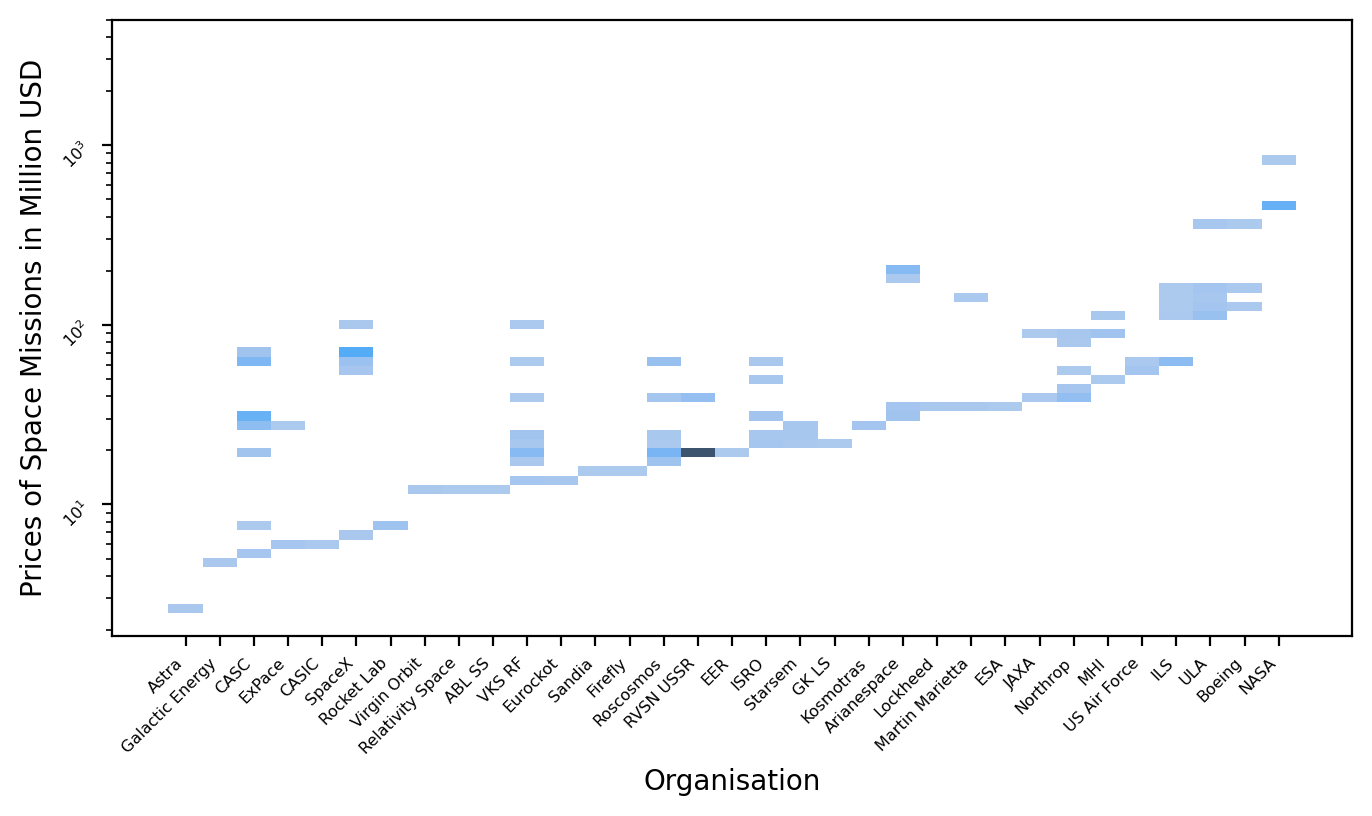

In [279]:
plt.figure(figsize=(8, 4), dpi=200)
ax = sns.histplot(
    data=df_data_dropna,
    x='Organisation',
    y='Price',
    bins=50,
    log_scale=(False, True)
)

ax.set(
    xlabel="Organisation",
    ylabel="Prices of Space Missions in Million USD",
    ylim=(0, 5000),
    # yticks=range(0, int(df_data.Price.max()), 100),
    # yticks=dict(type='log'),
  
)
#ax.yaxis.set_major_locator()
plt.setp(ax.get_xticklabels(), rotation=45, size='xx-small', ha="right")
plt.setp(ax.get_yticklabels(), rotation=45, size='xx-small', ha="right")


plt.show()

# Use a Choropleth Map to Show the Number of Launches by Country

* Create a choropleth map using [the plotly documentation](https://plotly.com/python/choropleth-maps/)
* Experiment with [plotly's available colours](https://plotly.com/python/builtin-colorscales/). I quite like the sequential colour `matter` on this map. 
* You'll need to extract a `country` feature as well as change the country names that no longer exist.

Wrangle the Country Names

You'll need to use a 3 letter country code for each country. You might have to change some country names.

* Russia is the Russian Federation
* New Mexico should be USA
* Yellow Sea refers to China
* Shahrud Missile Test Site should be Iran
* Pacific Missile Range Facility should be USA
* Barents Sea should be Russian Federation
* Gran Canaria should be USA


You can use the iso3166 package to convert the country names to Alpha3 format.

In [280]:
alpha3 = []
for country in df_data.Location:
  a3 = ""
  c = country.split(", ")[-1]
  if "Russia" in c or "Russian Federation" in c or "Barents Sea" in c:
    a3 = "RUS"
    #a3 = countries.get("Russia").alpha3
  elif "China" in c:
    a3 = "CHN"
  elif "Pacific Missile Range Facility" in c or "New Mexico" in c: 
    a3 = "USA"
  elif "Gran Canaria" in c:
    a3 = "USA"
  elif "Shahrud Missile Test Site" in c:
    a3 = countries.get("Iran").alpha3
  elif "Yellow Sea" in c:
    a3 = countries.get("China")
  elif "United Kingdom" in c:
    a3 = countries.get("GB").alpha3
  elif "Iran" in c:
    a3 = "IRN"
  elif "South Korea" in c:
    a3 = "ROK"
  elif "North Korea" in c:
    a3 = "PRK"
  elif "Pacific Ocean" in c:
    a3 = "KIR"
  
  else:   
    a3 = countries.get(c).alpha3
  alpha3.append(a3)

df_data["Alpha3"] = alpha3
launches_country = df_data.Alpha3.value_counts()

In [281]:
fig = px.choropleth(
    launches_country,
    locations=launches_country.index,
    color=launches_country,
    # hover_name="Location",
    color_continuous_scale=px.colors.sequential.Greens,
    
)
fig.update_geos(
    projection_type="natural earth",
    showland=True,
    showcountries=True,
    showocean=True, oceancolor="LightBlue"
)
fig.update_layout(height=300, margin={"r":0,"t":0,"l":0,"b":0}, title="Number of Space Launches Per Country",)
fig.show()

# Use a Choropleth Map to Show the Number of Failures by Country


In [282]:
status_by_country = df_data.groupby(['Mission_status', 'Alpha3']).agg({'Details': pd.Series.count})
fail_by_country = status_by_country.loc["Failure"]

fail_by_country.reset_index(inplace=True)
fail_by_country

,Alpha3,Details
0,AUS,4
1,BRA,2
2,CHN,26
3,FRA,15
4,GBR,1
5,IND,10
6,IRN,8
7,ISR,4
8,JPN,13
9,KAZ,113


In [283]:
# there must be an easier way
locations = []
for c in fail_by_country.Alpha3:
  if "ROK" in c:
    res = "South Korea"
  else:
    res = countries.get(c).name
  locations.append(res)

fail_by_country["Location"] = locations

In [284]:
fig = px.choropleth(
    fail_by_country,
    locations="Alpha3",
    color="Details",
    hover_name="Location",
    color_continuous_scale=px.colors.sequential.Reds,
)
fig.update_geos(
    projection_type="natural earth",
    showland=True,
    showcountries=True,
    showocean=True, oceancolor="LightBlue"
)
fig.update_layout(height=300, margin={"r":0,"t":0,"l":0,"b":0})
fig.show()

# Create a Plotly Sunburst Chart of the countries, organisations, and mission status. 

In [285]:
country_mission_df = df_data.groupby(["Alpha3", "Organisation", "Mission_status"]).agg({"Details": pd.Series.count})
country_mission_df

Details
Alpha3                       Organisation    Mission_status          
(China, CN, CHN, 156, China) CASC            Success                5
AUS                          ABMA            Success                1
                             CECLES          Failure                3
                             RAE             Failure                1
                                             Success                1
...                                                               ...
USA                          Virgin Galactic Failure                1
                                             Partial Failure        1
                                             Success               10
                             Virgin Orbit    Failure                1
                                             Success                4

[152 rows x 1 columns]

In [286]:
country_mission_df.reset_index(inplace=True)
country_mission_df["Count"] = country_mission_df.Details
country_mission_df.drop(columns="Details", inplace=True)

country_mission_df.head()

,Alpha3,Organisation,Mission_status,Count
0,"(China, CN, CHN, 156, China)",CASC,Success,5
1,AUS,ABMA,Success,1
2,AUS,CECLES,Failure,3
3,AUS,RAE,Failure,1
4,AUS,RAE,Success,1


In [287]:
country_mission_df.tail()

,Alpha3,Organisation,Mission_status,Count
147,USA,Virgin Galactic,Failure,1
148,USA,Virgin Galactic,Partial Failure,1
149,USA,Virgin Galactic,Success,10
150,USA,Virgin Orbit,Failure,1
151,USA,Virgin Orbit,Success,4


In [288]:
fig = px.sunburst(
    country_mission_df,
    path=["Alpha3", "Organisation", "Mission_status"],
    values="Count",
    color="Mission_status",
    title="Countries, Organisations, Mission Statuses",
    #color_continuous_scale='RdBu',
    # hover_data= ,
    width=700,
    height=700,
)
fig.show()

# Analyse the Total Amount of Money Spent by Organisation on Space Missions

In [289]:
exp_per_org = df_data.query("Price > 0").groupby("Organisation", as_index=False).agg({"Price": pd.Series.sum})
exp_per_org.sort_values(by="Price", inplace=True, ascending=False)
exp_per_org

,Organisation,Price
20,NASA,"62,076.00"
1,Arianespace,"18,683.00"
29,ULA,"17,260.00"
4,CASC,"14,826.16"
27,SpaceX,"14,746.00"
22,RVSN USSR,"14,200.00"
25,Roscosmos,"6,447.02"
13,ILS,"5,610.00"
21,Northrop,"4,435.00"
18,MHI,"3,762.50"


In [290]:
fig = px.bar(
    exp_per_org,
    x=exp_per_org.Price,
    y=exp_per_org.Organisation,
    color_continuous_scale='Aggrnyl',
    color=exp_per_org.Price,
    title="Total Amount of Money Spent by Organisation on Space Missions"
)

fig.update_xaxes(
    type='log'
)

fig.show()

# Analyse the Amount of Money Spent by Organisation per Launch

In [291]:
org_launch = df_data.query("Price > 0").groupby(["Organisation", "Datetime", "Details"], as_index=False).agg({"Price": pd.Series.sum})
# org_launch.reset_index(inplace=True)
org_launch

,Organisation,Datetime,Details,Price
0,ABL SS,2023-01-10,RS1 | DEMO-1 (Test Launch),12.00
1,Arianespace,2002-12-11,"Ariane 5 ECA | Hot Bird 7, Stentor & MFD-A/B",200.00
2,Arianespace,2004-03-02,Ariane 5 G+ | Rosetta,190.00
3,Arianespace,2004-07-18,Ariane 5 G+ | Anik F2,190.00
4,Arianespace,2004-12-18,"Ariane 5 G+ | Hélios 2A, PARASOL & Others",190.00
...,...,...,...,...
2470,Virgin Orbit,2021-01-17,LauncherOne | ELaNa XX,12.00
2471,Virgin Orbit,2021-06-30,"LauncherOne | Tubular Bells, Part One",12.00
2472,Virgin Orbit,2022-01-13,LauncherOne | STP-27VPB/Above the Clouds,12.00
2473,Virgin Orbit,2022-07-02,LauncherOne | STP-S28A,12.00


In [292]:
fig = px.scatter(
    org_launch, 
    x='Organisation', 
    y='Price', 
    # size='Price', 
    color='Organisation',
    hover_name='Organisation',
    hover_data=['Datetime', 'Price'],
    title="Amount of Money spent by Organisatin per Launch",
)
fig.update_layout(
    xaxis_title='Organisation',
    yaxis_title='Money spent per launch',
    yaxis=dict(type='log'),
    xaxis=dict(type='category', tickangle=-40),
    hovermode="y unified",
)
fig.show()
    


In [293]:
# plt.figure(figsize=(8,6), dpi=200)

box = px.box(
    org_launch,
    x="Organisation",
    y="Price", 
    title="Amount of Money spent by Organisatin/per Launch - 2nd plot",
)

box.update_layout(
    xaxis_title='Organisation',
    yaxis_title='Money spent per Mission',
    yaxis=dict(
        type='log',
        # tickangle=30,

    ), 
    xaxis=dict(
        type='category',
        tickangle=-30,
        showgrid=True,
    ), 
)
box.show()

    # ax.set(
    #     ylabel='Money spent per mission',
    #     xlabel='Organisation',
    # for label in ax.get_xticklabels(which="major"):
      # label.set(rotation=30, horizontalalignment="right")


# Chart the Number of Launches per Year

In [294]:
df_data["Year"] = df_data.Datetime.dt.year
launches_year = df_data.groupby(by="Year", as_index=False).agg({"Details": pd.Series.count})


In [295]:
line_chart = px.line(
    launches_year,
    x="Year",
    y="Details",
    labels={
        "Year": "Year",
        "Details": "Number of Space Launches"
    },
    title="Number of Space Launches per Year"
)
line_chart.show()

# Chart the Number of Launches Month-on-Month until the Present

Which month has seen the highest number of launches in all time? Superimpose a rolling average on the month on month time series chart. 

In [296]:
df_data["Date_"] = df_data.Datetime.dt.to_period('M').dt.to_timestamp()
launches_month = df_data.groupby(by=["Date_"], as_index=False).agg({"Details": pd.Series.count})
# launches_month["Date"] = launches_month.Date.to_timestamp(freq="M")
print(launches_month.head())
launches_month.tail()

       Date_  Details
0 1957-10-01        1
1 1957-11-01        1
2 1957-12-01        1
3 1958-02-01        2
4 1958-03-01        3


,Date_,Details
778,2022-12-01,18
779,2023-01-01,16
780,2023-02-01,12
781,2023-03-01,24
782,2023-04-01,7


In [297]:
latest_launches_month = launches_month.query("Date_.dt.year >= 2010")
latest_launches_month.sample(10)

,Date_,Details
763,2021-09-01,11
671,2014-01-01,5
696,2016-02-01,7
719,2018-01-01,13
645,2011-11-01,9
777,2022-11-01,20
626,2010-04-01,9
714,2017-08-01,8
649,2012-03-01,4
692,2015-10-01,8


In [298]:
rolling = latest_launches_month.Details.rolling(window=5).mean()
rolling1 = launches_month.Details.rolling(window=5).mean()

In [299]:
# try line chart instead: every year represents one line
scatter = px.scatter(
    launches_month,
    x="Date_",
    y="Details",
    color="Details",
    #size=100,
    labels={
        "Date_": "Date",
        "Details": "Space Launches per Month"
    },
    hover_name=launches_month.Date_.dt.strftime("%Y-%m-%d"),
    hover_data=["Details"],
    # hover_data=("Detail", "Date_"),
    trendline='rolling',
    trendline_options=dict(
        function="median",
        window= 5,
    ),
    width=1150,
    height=400,
)

scatter.update_traces(
    hovertemplate=None
)

scatter.update_layout(
    hovermode="x unified",
    title="Number of Launches per Month from first Space Launch till today",
    xaxis_tickformat = '%Y',
    xaxis=dict(
        type='date',
        tickangle=30,
        tick0="%Y-%m",
        dtick="M60",
        range=(launches_month.Date_.min(), launches_month.Date_.max()),
        minor=dict(
            tick0="%M",
            showgrid=True,
        ),
    ) 
)
scatter.update_traces(
  showlegend=True    
)

scatter.show()

4


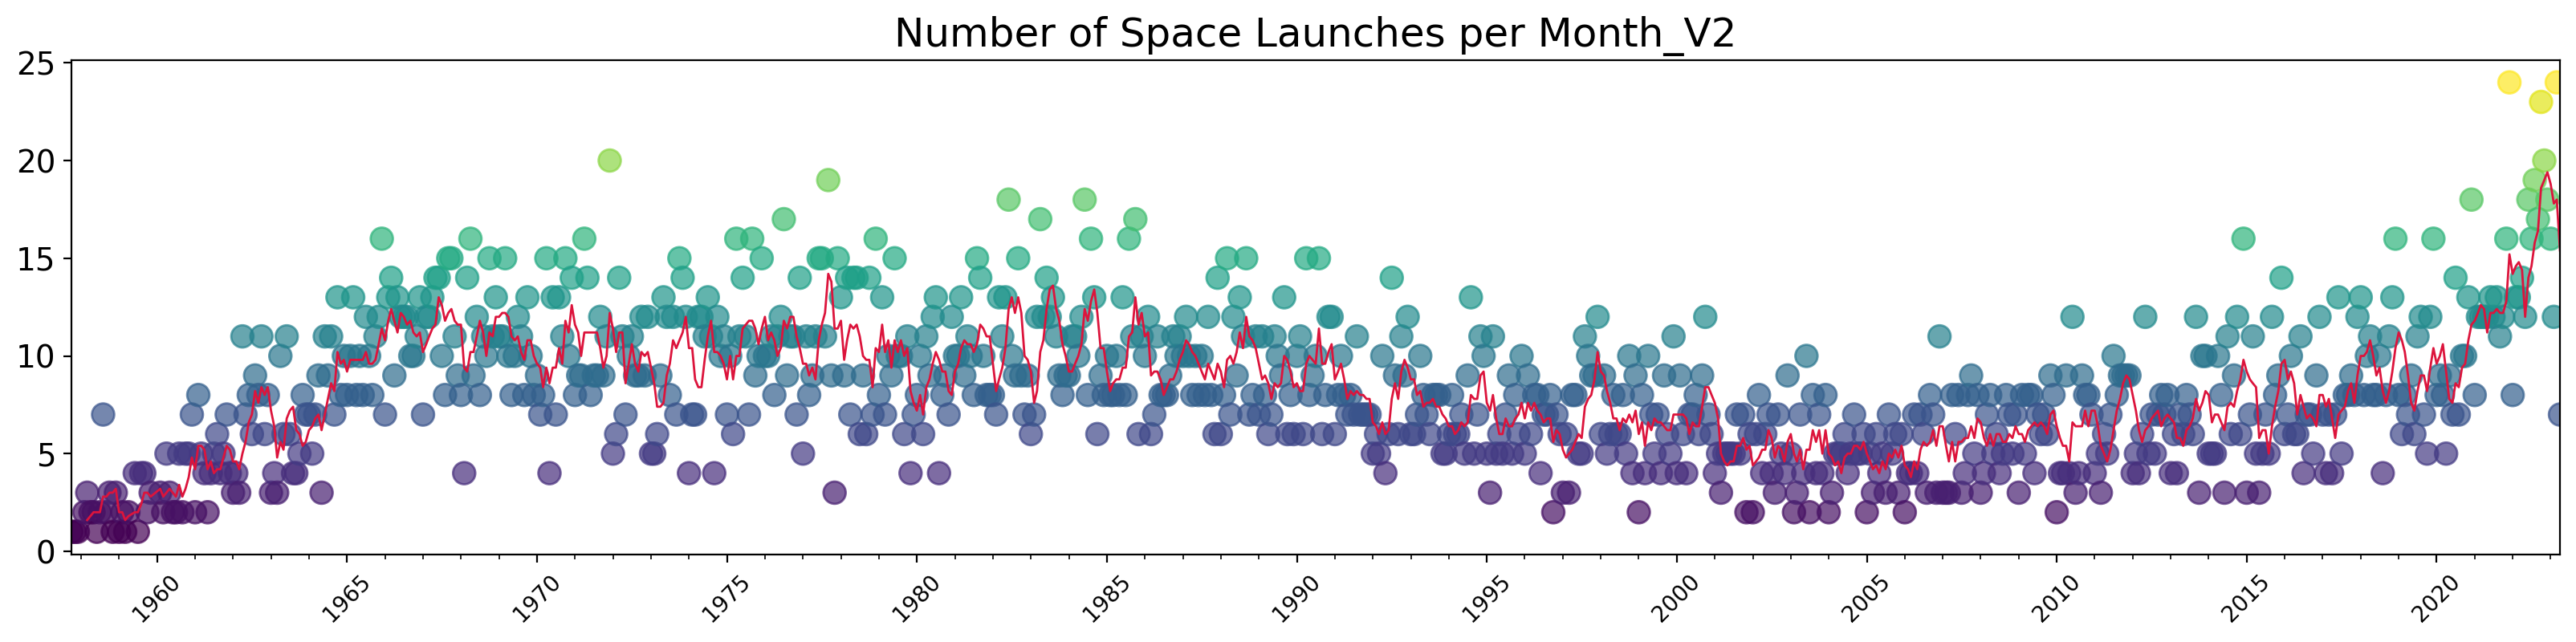

In [300]:
plt.figure(figsize=(20, 4), dpi=200)
plt.title('Number of Space Launches per Month_V2', fontsize=18)
plt.xticks(ticks=np.arange(2010, 2022, 10), fontsize=10, rotation=45)
# plt.xticks(fontsize=10, rotation=45)
plt.yticks(fontsize=14)
plt.xlim(launches_month.Date_.min(), launches_month.Date_.max())

plt.scatter(x=launches_month.Date_, 
            y=launches_month.Details, 
            c=launches_month.Details,
            alpha=0.7,
            s=100,
)
print(launches_month.index[4])
plt.plot(launches_month.Date_, 
         rolling1.values,
         c='crimson',
         linewidth=1,
)

ax = plt.gca()
ax.xaxis.set_major_locator(mdates.YearLocator(5, month=1, day=1))
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y'))

ax.xaxis.set_minor_locator(mdates.YearLocator())
# ax.xaxis.set_minor_formatter(mdates.DateFormatter('%m'))

plt.show()

627


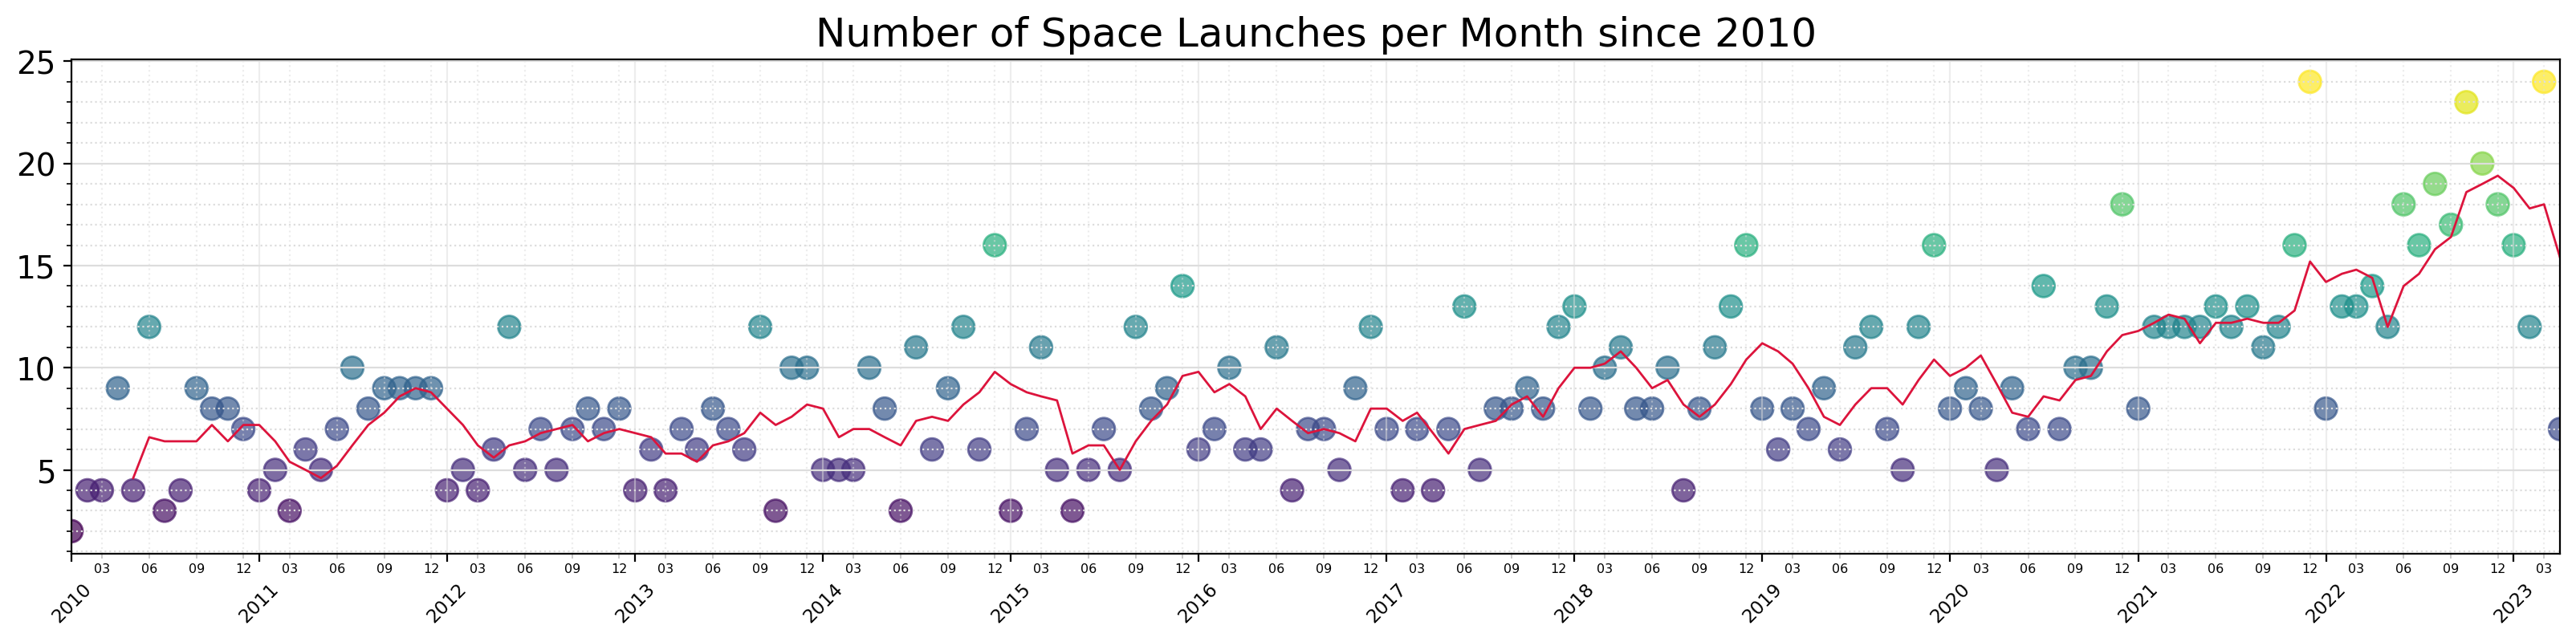

In [301]:
plt.figure(figsize=(20, 4), dpi=200)
plt.title('Number of Space Launches per Month since 2010', fontsize=18)
plt.xticks(ticks=np.arange(2010, 2022, 10), fontsize=10, rotation=45)
plt.xticks(minor=True, fontsize=10, rotation=45)
# plt.xticks(fontsize=10, rotation=45)
plt.yticks(fontsize=14)
plt.xlim(latest_launches_month.Date_.min(), latest_launches_month.Date_.max())

plt.scatter(x=latest_launches_month.Date_, 
            y=latest_launches_month.Details, 
            c=latest_launches_month.Details,
            alpha=0.7,
            s=100,
)
print(latest_launches_month.index[4])
plt.plot(latest_launches_month.Date_, 
         rolling.values,
         c='crimson',
         linewidth=1,
)

ax = plt.gca()

ax.tick_params(
                axis='x',
                which='major',
                labelsize='small',
                pad=8,
                # labelbottom=True,
                grid_color='white',
                grid_alpha=0.5,
            )
ax.tick_params(
                axis='x',
                which='minor',
                labelsize='xx-small',
                color='silver',
                grid_color='white',
                grid_alpha=0.5,
                # labelbottom=True,
                pad=2,
)

ax.grid(visible=True, which='major', axis='x',  color='#DDDDDD', linewidth=0.8)
ax.grid(visible=True, which='minor', axis='x', color='#DDDDDD', linestyle=':', linewidth=0.8)

ax.grid(visible=True, which='major', axis='y',  color='#DDDDDD', linewidth=0.8)
ax.grid(visible=True, which='minor', axis='y', color='#DDDDDD', linestyle=':', linewidth=0.8)

ax.minorticks_on()
ax.xaxis.set_major_locator(mdates.YearLocator(1, month=1, day=1))
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y'))

ax.xaxis.set_minor_locator(mdates.MonthLocator(bymonth=[3, 6, 9, 12]))
ax.xaxis.set_minor_formatter(mdates.DateFormatter('%m'))

plt.show()

# Launches per Month: Which months are most popular and least popular for launches?

Some months have better weather than others. Which time of year seems to be best for space missions?

In [302]:
df_data["Month"] = df_data.Datetime.dt.month_name()
# pop_months=df_data.query("Date.dt.year >= 2010").groupby(by="Month", as_index=False).agg({"Detail": pd.Series.count})
pop_months_py=df_data.groupby(by=["Year", "Month"], as_index=False).agg({"Details": pd.Series.count})
pop_months=df_data.groupby(by=[ "Month"], as_index=False).agg({"Details": pd.Series.count})
pop_months.sort_values(by="Details", inplace=True)
pop_months_py

,Year,Month,Details
0,1957,December,1
1,1957,November,1
2,1957,October,1
3,1958,April,2
4,1958,August,7
...,...,...,...
778,2022,September,17
779,2023,April,7
780,2023,February,12
781,2023,January,16


In [303]:
pie = px.pie(
    pop_months,
    names="Month",
    values="Details",
    title="Months with the most/least number of space launches as pie",
)

pie.show()

In [304]:
line = px.line(
    pop_months_py,
    x="Year",
    y="Details",
    color="Month",

    title="Months with the most/least number of space launches over years of space missions",
)

line.show()

In [305]:
# print("In terms of climate change it isn't useful to look at a much longer distance than about 10 years. \n" \
# "This is why we are only looking at space launches that occured since 2010\n")

month_max = pop_months.Month[pop_months.Details.idxmax()]
max_val = pop_months.Details[pop_months.Details.idxmax()]
month_min = pop_months.Month[pop_months.Details.idxmin()]
min_val = pop_months.Details[pop_months.Details.idxmin()]

print("Most vs. least popular months for space launches:\n")
print(f"Most popular: {month_max} with {max_val} space launches")
print(f"Least popular: {month_min} with {min_val} space launches")

Most vs. least popular months for space launches:

Most popular: December with 683 space launches
Least popular: January with 395 space launches


In [306]:
print("Just to compare: \nIn terms of climate change it isn't useful to look at a much longer distance than about 10 years. \n" \
"This is why we are only looking at space launches that occured since 2010\n")

pop_months = df_data.query("Datetime.dt.year >= 2010").groupby(by="Month", as_index=False).agg({"Details": pd.Series.count})
month_max = pop_months.Month[pop_months.Details.idxmax()]
max_val = pop_months.Details[pop_months.Details.idxmax()]
month_min = pop_months.Month[pop_months.Details.idxmin()]
min_val = pop_months.Details[pop_months.Details.idxmin()]

print("Most vs. least popular months for space launches:\n")
print(f"Most popular: {month_max} with {max_val} space launches")
print(f"Least popular: {month_min} with {min_val} space launches")

Just to compare: 
In terms of climate change it isn't useful to look at a much longer distance than about 10 years. 
This is why we are only looking at space launches that occured since 2010

Most vs. least popular months for space launches:

Most popular: December with 180 space launches
Least popular: January with 96 space launches


# How has the Launch Price varied Over Time? 

Create a line chart that shows the average price of rocket launches over time. 

In [307]:
av_price_launch = df_data.query("Price > 0").groupby(by="Year", as_index=False).agg({"Price": pd.Series.mean})

In [308]:
price_line = px.line(
    av_price_launch,
    x="Year",
    y="Price",
)

price_line.update_layout(
    hovermode="x unified",
    title="Average Launch Price in Mio. USD over time",
    xaxis_tickformat = '%Y',
    xaxis=dict(
        type='date',
        
        tickangle=30,
        tick0="%Y-%m",
        dtick="M60",
        minor=dict(
            tick0="%M",
            showgrid=True,
        ),
    )
)

price_line.show()

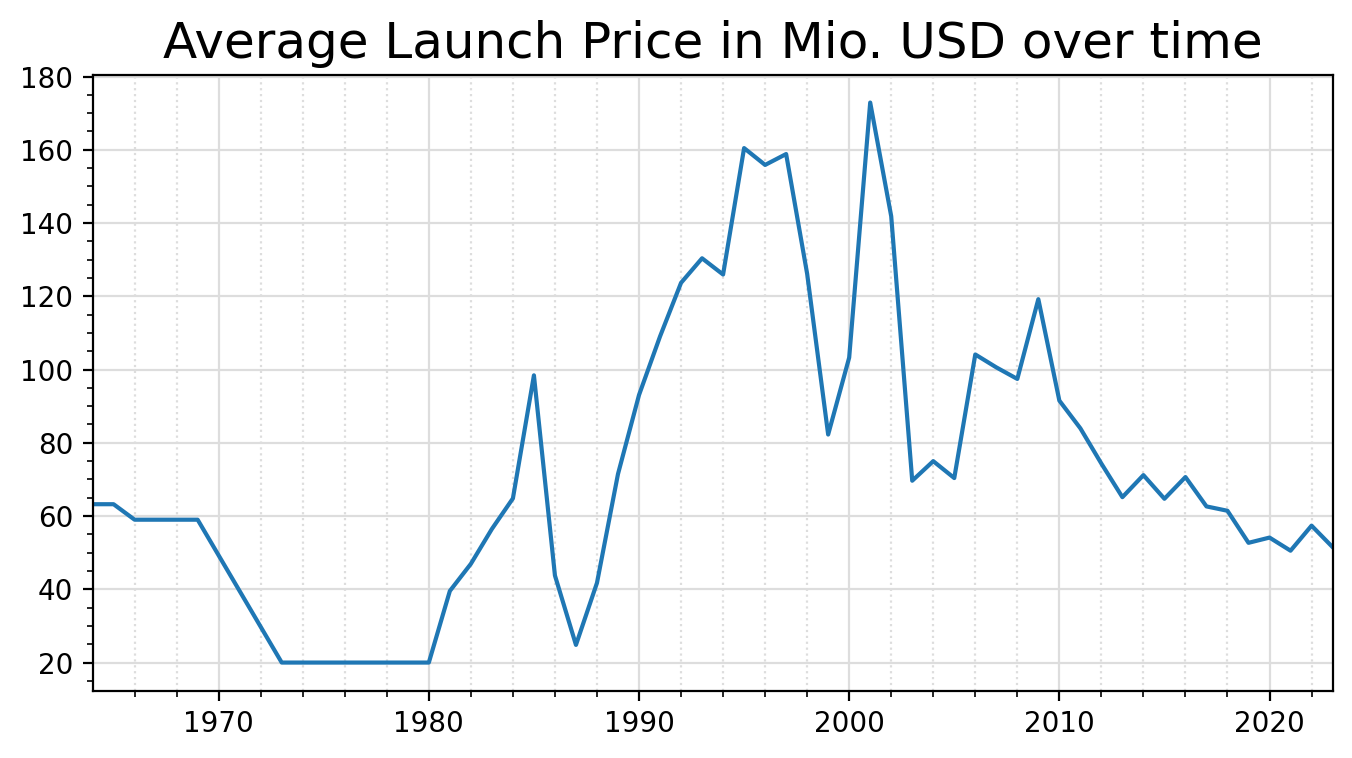

In [309]:
plt.figure(figsize=(8, 4), dpi=200)
plt.title('Average Launch Price in Mio. USD over time', fontsize=18)
plt.plot(
    "Year",
    "Price",    
    data=av_price_launch
)
plt.xlim(1964, 2023)

ax = plt.gca()
ax.grid(visible=True, which='major', axis='x',  color='#DDDDDD', linewidth=0.8)
ax.grid(visible=True, which='minor', axis='x', color='#DDDDDD', linestyle=':', linewidth=0.8)

ax.grid(visible=True, which='major', axis='y',  color='#DDDDDD', linewidth=0.8)
# ax.grid(visible=True, which='minor', axis='y', color='#DDDDDD', linestyle=':', linewidth=0.8)

ax.minorticks_on()

plt.show()

# Chart the Number of Launches over Time by the Top 10 Organisations. 

How has the dominance of launches changed over time between the different players? 

In [310]:
launches_p_org = df_data.groupby(by=["Organisation", "Year"], as_index=False).agg({"Details": pd.Series.count})
launches_p_org.sort_values(by="Details", ascending=False)
launches_p_org

,Organisation,Year,Details
0,ABL SS,2023,1
1,ABMA,1958,7
2,ABMA,1959,4
3,ABMA,1960,2
4,ABMA,1961,3
...,...,...,...
783,Virgin Orbit,2023,1
784,i-Space,2019,1
785,i-Space,2021,2
786,i-Space,2022,1


In [311]:
top_ten_org = df_data.Organisation.value_counts(sort=True, ascending=False)[:10]
top_ten_org

RVSN USSR           2476
US Air Force         549
CASC                 484
Roscosmos            355
VKS RF               336
Arianespace          295
General Dynamics     251
SpaceX               233
NASA                 222
ULA                  155
Name: Organisation, dtype: int64

In [312]:
top_ten = df_data.groupby(["Organisation", "Year"], as_index=False).agg({"Details": pd.Series.count})
top_ten = top_ten.query("Organisation in @top_ten_org.index")
top_ten

,Organisation,Year,Details
16,Arianespace,1984,3
17,Arianespace,1985,4
18,Arianespace,1986,3
19,Arianespace,1987,2
20,Arianespace,1988,6
...,...,...,...
769,VKS RF,2019,8
770,VKS RF,2020,7
771,VKS RF,2021,5
772,VKS RF,2022,13


In [313]:
line_graph = px.line(
    top_ten,
    x='Year',
    y='Details',
    color='Organisation',
    labels={
        'Organisation': 'Organisation',
        'Year': 'Year',
        'Details': 'Number of Space Launches per Year'
    }
)


line_graph.show()

# Cold War Space Race: USA vs USSR

The cold war lasted from the start of the dataset up until 1991. 

In [314]:
df_data.groupby(by='Alpha3').agg({"Details": pd.Series.count})

,Details
Alpha3,
"(China, CN, CHN, 156, China)",5
AUS,6
BRA,3
CHN,520
FRA,322
GBR,1
IND,86
IRN,17
ISR,14


In [315]:
ex_sovjet = ["KAZ", "RUS", "ARM", "EST", "GEO", "KGZ", "LVA", "LTU", "MDA", "TJK", "TKM", "UZB"]
df_war = df_data.query("Alpha3 == 'USA' or Alpha3 in @ex_sovjet")
df_war = df_war.query("Year <= 1991")
df_war

,Organisation,Location,Datetime,Details,Status,Price,Mission_status,Alpha3,Year,Date_,Month
2787,RVSN USSR,"Site 175/58, Baikonur Cosmodrome, Kazakhstan",1991-12-20,Rokot/Briz K | GVM Demo Flight,Retired,0.00,Success,KAZ,1991,1991-12-01,December
2788,RVSN USSR,"Site 81/23, Baikonur Cosmodrome, Kazakhstan",1991-12-19,Proton K/Block-DM-2 | Raduga 28,Retired,0.00,Success,KAZ,1991,1991-12-01,December
2789,RVSN USSR,"Site 32/2, Plesetsk Cosmodrome, Russia",1991-12-18,Tsyklon-3 | Intercosmos 25 & Magion 3,Retired,0.00,Success,RUS,1991,1991-12-01,December
2790,RVSN USSR,"Site 31/6, Baikonur Cosmodrome, Kazakhstan",1991-12-17,Soyuz U | Cosmos 2174,Retired,20.00,Success,KAZ,1991,1991-12-01,December
2792,General Dynamics,"SLC-36B, Cape Canaveral SFS, Florida, USA",1991-12-07,Atlas II | Eutelsat 2F3,Retired,0.00,Success,USA,1991,1991-12-01,December
...,...,...,...,...,...,...,...,...,...,...,...
6505,US Navy,"LC-18A, Cape Canaveral SFS, Florida, USA",1958-02-05,Vanguard | Vanguard TV3BU,Retired,0.00,Failure,USA,1958,1958-02-01,February
6506,ABMA,"LC-26A, Cape Canaveral SFS, Florida, USA",1958-02-01,Juno I | Explorer 1,Retired,0.00,Success,USA,1958,1958-02-01,February
6507,US Navy,"LC-18A, Cape Canaveral SFS, Florida, USA",1957-12-06,Vanguard | Vanguard TV3,Retired,0.00,Failure,USA,1957,1957-12-01,December
6508,RVSN USSR,"Site 1/5, Baikonur Cosmodrome, Kazakhstan",1957-11-03,Sputnik 8K71PS | Sputnik 2,Retired,0.00,Success,KAZ,1957,1957-11-01,November


## Create a Plotly Pie Chart comparing the total number of launches of the USSR and the USA

Hint: Remember to include former Soviet Republics like Kazakhstan when analysing the total number of launches. 

In [316]:
for alpha3 in ex_sovjet:
  df_war.replace(to_replace=alpha3, value="USSR", inplace=True)
  # df_war.replace(to_replace="KAZ", value="USSR", inplace=True)
df_war

,Organisation,Location,Datetime,Details,Status,Price,Mission_status,Alpha3,Year,Date_,Month
2787,RVSN USSR,"Site 175/58, Baikonur Cosmodrome, Kazakhstan",1991-12-20,Rokot/Briz K | GVM Demo Flight,Retired,0.00,Success,USSR,1991,1991-12-01,December
2788,RVSN USSR,"Site 81/23, Baikonur Cosmodrome, Kazakhstan",1991-12-19,Proton K/Block-DM-2 | Raduga 28,Retired,0.00,Success,USSR,1991,1991-12-01,December
2789,RVSN USSR,"Site 32/2, Plesetsk Cosmodrome, Russia",1991-12-18,Tsyklon-3 | Intercosmos 25 & Magion 3,Retired,0.00,Success,USSR,1991,1991-12-01,December
2790,RVSN USSR,"Site 31/6, Baikonur Cosmodrome, Kazakhstan",1991-12-17,Soyuz U | Cosmos 2174,Retired,20.00,Success,USSR,1991,1991-12-01,December
2792,General Dynamics,"SLC-36B, Cape Canaveral SFS, Florida, USA",1991-12-07,Atlas II | Eutelsat 2F3,Retired,0.00,Success,USA,1991,1991-12-01,December
...,...,...,...,...,...,...,...,...,...,...,...
6505,US Navy,"LC-18A, Cape Canaveral SFS, Florida, USA",1958-02-05,Vanguard | Vanguard TV3BU,Retired,0.00,Failure,USA,1958,1958-02-01,February
6506,ABMA,"LC-26A, Cape Canaveral SFS, Florida, USA",1958-02-01,Juno I | Explorer 1,Retired,0.00,Success,USA,1958,1958-02-01,February
6507,US Navy,"LC-18A, Cape Canaveral SFS, Florida, USA",1957-12-06,Vanguard | Vanguard TV3,Retired,0.00,Failure,USA,1957,1957-12-01,December
6508,RVSN USSR,"Site 1/5, Baikonur Cosmodrome, Kazakhstan",1957-11-03,Sputnik 8K71PS | Sputnik 2,Retired,0.00,Success,USSR,1957,1957-11-01,November


In [317]:
num_launches = df_war.Alpha3.value_counts()
num_launches

USSR    2478
USA     1075
Name: Alpha3, dtype: int64

In [318]:
pie = px.pie(
    num_launches,
    names=num_launches.index,
    values = num_launches.values,
    title="USA vs. USSR: Who made the Cold War Space Race?"
)
pie.show()

## Create a Chart that Shows the Total Number of Launches Year-On-Year by the Two Superpowers

In [319]:
launches_year_cw = df_war.groupby(["Year", "Alpha3"], as_index=False).agg({"Details": pd.Series.count})
launches_year_cw

,Year,Alpha3,Details
0,1957,USA,1
1,1957,USSR,2
2,1958,USA,23
3,1958,USSR,5
4,1959,USA,20
...,...,...,...
65,1989,USSR,75
66,1990,USA,27
67,1990,USSR,80
68,1991,USA,19


In [320]:
line_graph = px.line(
    launches_year_cw,
    x='Year',
    y='Details',
    color='Alpha3',
    labels={
        'Alpha3': 'Side of the Big Lake',
        'Year': 'Year',
        'Details': 'Number of Space Launches per Year'
    },
    title="Cold War Space Race: Number of Space Launches per Year"
)


line_graph.show()

## Chart the Total Number of Mission Failures Year on Year.

In [321]:
df_war_stat_country = df_war.groupby(['Year', 'Mission_status', 'Alpha3'], as_index=False).agg({'Details': pd.Series.count})
# status_by_country = df_data.groupby(['Mission_Status', 'Alpha3', 'Location']).agg({'Detail': pd.Series.count})
df_war_fail_by_country = df_war_stat_country.query("Mission_status == 'Failure'")
print(df_war_stat_country)
df_war_fail_by_country

     Year   Mission_status Alpha3  Details
0    1957          Failure    USA        1
1    1957          Success   USSR        2
2    1958          Failure    USA       16
3    1958          Failure   USSR        4
4    1958  Partial Failure    USA        2
..    ...              ...    ...      ...
166  1991          Failure    USA        1
167  1991          Failure   USSR        2
168  1991  Partial Failure    USA        1
169  1991          Success    USA       17
170  1991          Success   USSR       60

[171 rows x 4 columns]


,Year,Mission_status,Alpha3,Details
0,1957,Failure,USA,1
2,1958,Failure,USA,16
3,1958,Failure,USSR,4
7,1959,Failure,USA,10
8,1959,Failure,USSR,1
...,...,...,...,...
157,1989,Failure,USSR,1
161,1990,Failure,USA,1
162,1990,Failure,USSR,4
166,1991,Failure,USA,1


In [322]:
fails_bar = px.bar(
    x=df_war_fail_by_country.Year,
    y=df_war_fail_by_country.Details,
    barmode='group',

    # color_continuous_scale='Aggrnyl',
    color=df_war_fail_by_country.Alpha3,
    title="Cold War Space Race: Number of Failed Space Launches in US/USSR by Year",
)

fails_bar.update_layout(
    xaxis_title='Year',
    yaxis_title='Failed Space Launches',
    xaxis_tickformat = '%Y',
    xaxis=dict(
        type='date',
        tickangle=-30,
        # tick0="%Y",
        dtick="M12",
        showgrid=True,
        # range=(1955, 1991),
        minor=dict(
            # tick0="%M",
            # showgrid=True,
        ),
    ),
    # coloraxis_showscale=False,

)

fails_bar.show()

## Chart the Percentage of Failures over Time

Did failures go up or down over time? Did the countries get better at minimising risk and improving their chances of success over time? 

In [323]:
war_mission_stat = df_war.groupby(["Year", "Alpha3", "Mission_status"])["Details"].count()
war_mission_stat

Year  Alpha3  Mission_status 
1957  USA     Failure             1
      USSR    Success             2
1958  USA     Failure            16
              Partial Failure     2
              Success             5
                                 ..
1991  USA     Failure             1
              Partial Failure     1
              Success            17
      USSR    Failure             2
              Success            60
Name: Details, Length: 171, dtype: int64

In [324]:
status_by_country = df_war.groupby(['Year', 'Alpha3', 'Mission_status']).agg({'Details': pd.Series.count})

launches_year_cw.set_index(["Year", "Alpha3"], inplace=True)
print(f'launches year {launches_year_cw}')
# status_by_country = df_data.groupby(['Mission_status', 'Alpha3', 'Location']).agg({'Detail': pd.Series.count})
fail_by_country = status_by_country.query("@status_by_country.index.get_level_values(2) == 'Failure'") 


usa = []
ussr = []
# for y in war_mission_stat.get_level_values(0):
  # print(y)
  # for el in war_mission_stat.loc[(y, y[1])]:
    # print(el)

launches year              Details
Year Alpha3         
1957 USA           1
     USSR          2
1958 USA          23
     USSR          5
1959 USA          20
...              ...
1989 USSR         75
1990 USA          27
     USSR         80
1991 USA          19
     USSR         62

[70 rows x 1 columns]


In [325]:
fail_by_country.reset_index(2, drop=True, inplace=True)
print(f'fail year {fail_by_country}')

fail year              Details
Year Alpha3         
1957 USA           1
1958 USA          16
     USSR          4
1959 USA          10
     USSR          1
...              ...
1989 USSR          1
1990 USA           1
     USSR          4
1991 USA           1
     USSR          2

[62 rows x 1 columns]


In [326]:
launches_year_cw["Failure"] = fail_by_country
launches_year_cw.reset_index(inplace=True)
launches_year_cw.fillna(value=0, inplace=True)


In [327]:
launches_year_cw["Pct"] = 100 * launches_year_cw.Failure / launches_year_cw.Details
launches_year_cw

,Year,Alpha3,Details,Failure,Pct
0,1957,USA,1,1.00,100.00
1,1957,USSR,2,0.00,0.00
2,1958,USA,23,16.00,69.57
3,1958,USSR,5,4.00,80.00
4,1959,USA,20,10.00,50.00
...,...,...,...,...,...
65,1989,USSR,75,1.00,1.33
66,1990,USA,27,1.00,3.70
67,1990,USSR,80,4.00,5.00
68,1991,USA,19,1.00,5.26


In [328]:
fails_bar = px.bar(
    x=launches_year_cw.Year,
    y=launches_year_cw.Pct,
    barmode='group',

    # color_continuous_scale='Aggrnyl',
    color=launches_year_cw.Alpha3,
    title="Cold War Space Race: Percentage of Failed Space Launches in US/USSR by Year",
)

fails_bar.update_layout(
    xaxis_title='Year',
    yaxis_title='Percentage of Failed Space Launches',
    
    xaxis_tickformat = '%Y',
    xaxis=dict(
        type='date',
        tickangle=-30,
        # tick0="%Y",
        dtick="M12",
        showgrid=True,
        # range=(1955, 1991),
        minor=dict(
            # tick0="%M",
            # showgrid=True,
        ),
    ),
    # coloraxis_showscale=False,

)

fails_bar.show()

# For Every Year Show which Country was in the Lead in terms of Total Number of Launches up to and including including 2020)

Do the results change if we only look at the number of successful launches? 

In [329]:
lead_country_y = df_data.groupby(["Year", "Alpha3"])["Details"].count()

In [330]:
lead_country_y

Year  Alpha3
1957  KAZ        2
      USA        1
1958  KAZ        5
      USA       23
1959  KAZ        4
                ..
2023  JPN        2
      KAZ        4
      NZL        1
      RUS        2
      USA       28
Name: Details, Length: 471, dtype: int64

In [331]:
most_launches = []
for year in lead_country_y.index.get_level_values('Year').unique():
  # print(lead_country_y.loc[year])
  max_val = 0
  max_c = ""
  for country, val in lead_country_y.loc[year].items():
    # print(country, val)
    if val > max_val:
      max_val = val
      max_c = country
  most_launches.append({
      "Year": year,
      "Country": country,
      "Value": val,
  })

most_launches_py = pd.DataFrame(most_launches)    
most_launches_py

,Year,Country,Value
0,1957,USA,1
1,1958,USA,23
2,1959,USA,20
3,1960,USA,32
4,1961,USA,47
...,...,...,...
62,2019,USA,25
63,2020,USA,41
64,2021,USA,57
65,2022,USA,82


In [332]:
lead_country_y = pd.DataFrame(lead_country_y)
lead_country_y.reset_index(inplace=True)

In [333]:
launches_line = px.line(
  lead_country_y,
  x="Year", 
  y="Details",
  color="Alpha3",
  #width=800,
)

launches_line.show()

# Create a Year-on-Year Chart Showing the Organisation Doing the Most Number of Launches

Which organisation was dominant in the 1970s and 1980s? Which organisation was dominant in 2018, 2019 and 2020? 

In [334]:
organisations_year = df_data.groupby(["Year", "Organisation"], as_index=False).agg({"Details": pd.Series.count})
organisations_year

,Year,Organisation,Details
0,1957,RVSN USSR,2
1,1957,US Navy,1
2,1958,ABMA,7
3,1958,NASA,2
4,1958,RVSN USSR,5
...,...,...,...
783,2023,Space Pioneer,1
784,2023,SpaceX,24
785,2023,VKS RF,3
786,2023,Virgin Orbit,1


In [335]:
organisations_line = px.line(
    organisations_year,
    x="Year",
    y="Details",
    color="Organisation"
)
organisations_line.show()

In [336]:
print("As one can see in the above chart\nThe most active space company between 1970 and 1990 was RVSN USSR")
print("Between 2018 and 2020 CASC, a chinese organisation, had most rocket launches.")

As one can see in the above chart
The most active space company between 1970 and 1990 was RVSN USSR
Between 2018 and 2020 CASC, a chinese organisation, had most rocket launches.
